# October 21 - r/leafs Fantasy Hockey Standings Analysis

In [1]:
# importing the standard data analysis tools for working with & visualzing data in python
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(sum(map(ord,"aesthetics")))
%matplotlib inline

In [2]:
# I haven't automated the data scraping yet, just downloaded the table into excel from Yahoo
df = pd.read_csv('data-files/2017-10-22.csv')

In [3]:
# Renaming the columns for clarity
df.rename(columns={'GP*.1': 'GoalieGP', 'GP*': 'PlayerGP'}, inplace=True)
df_corr = df.corr()
df_corr.loc[['GAA'],['Rank']] = df_corr.loc[['GAA'],['Rank']]*-1
df_corr.sort_values('Rank', ascending=False)

,Rank,Actual Rank,PlayerGP,G,A,+/-,PIM,PPP,SHP,SOG,FW,HIT,BLK,GoalieGP,W,GAA,SA,SV%,SHO
Rank,1.000000,-0.997230,0.427368,0.235462,0.364636,0.253306,-0.159320,0.289354,0.408425,0.397156,0.405737,0.274307,0.202725,0.741744,0.768176,-0.712127,0.748388,0.791047,0.686890
SV%,0.791047,-0.796045,0.232026,-0.078815,0.367446,0.052541,-0.234181,0.244095,0.057902,0.126211,0.362353,0.131593,0.397880,0.538196,0.672853,-0.932107,0.536323,1.000000,0.588649
W,0.768176,-0.779595,0.422625,0.089280,-0.026551,0.127673,-0.173583,-0.111719,0.108437,0.424203,0.460701,0.263772,0.446768,0.844667,1.000000,-0.557467,0.876448,0.672853,0.552462
SA,0.748388,-0.762412,0.405043,0.278288,-0.172342,0.154426,-0.106662,-0.094876,0.182683,0.489462,0.325742,0.407731,0.440584,0.966389,0.876448,-0.359554,1.000000,0.536323,0.547273
GoalieGP,0.741744,-0.759469,0.487995,0.305474,-0.188651,0.129984,-0.022856,-0.105405,0.153730,0.507073,0.248490,0.471170,0.472671,1.000000,0.844667,-0.400361,0.966389,0.538196,0.529769
GAA,0.712127,0.709182,-0.234906,0.045078,-0.409872,0.018988,0.203076,-0.242627,-0.011973,-0.128205,-0.269349,-0.133990,-0.296270,-0.400361,-0.557467,1.000000,-0.359554,-0.932107,-0.485646
SHO,0.686890,-0.656215,0.102043,0.327641,-0.006983,0.291887,-0.284528,0.247721,0.191086,-0.071713,0.385575,0.119203,0.159946,0.529769,0.552462,-0.485646,0.547273,0.588649,1.000000
PlayerGP,0.427368,-0.429074,1.000000,0.079628,0.196309,-0.126964,-0.104068,0.020867,0.174662,0.764288,-0.262476,0.236917,0.342325,0.487995,0.422625,-0.234906,0.405043,0.232026,0.102043
SHP,0.408425,-0.412663,0.174662,0.536183,0.082210,0.480219,-0.159599,-0.081896,1.000000,0.017127,0.285620,-0.054335,-0.319517,0.153730,0.108437,-0.011973,0.182683,0.057902,0.191086
FW,0.405737,-0.408352,-0.262476,0.032209,-0.089616,0.172545,-0.178782,-0.030256,0.285620,-0.389232,1.000000,-0.063238,-0.097800,0.248490,0.460701,-0.269349,0.325742,0.362353,0.385575


In [4]:
# Seperated Player vs. Goalie data
df_players = df[['Rank', 'Team Name', 'PlayerGP', 'G', 'A', '+/-', 'PIM', 'PPP', 'SHP', 'SOG', 'FW', 'HIT', 'BLK']]
df_goalies = df[['Rank', 'Team Name', 'GoalieGP', 'W', 'GAA', 'SA', 'SV%', 'SHO']]

In [5]:
df_goalies.describe()

,Rank,GoalieGP,W,GAA,SA,SV%,SHO
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000
mean,10.650000,10.950000,5.550000,2.907500,326.700000,0.908400,0.65000
std,6.002412,2.762055,3.103055,0.602197,96.612138,0.017434,0.67082
min,1.000000,5.000000,1.000000,2.070000,128.000000,0.870000,0.00000
25%,6.000000,9.750000,3.750000,2.497500,269.000000,0.897000,0.00000
50%,10.500000,10.500000,5.000000,2.860000,303.500000,0.909500,1.00000
75%,15.500000,12.250000,7.250000,3.080000,375.750000,0.923000,1.00000
max,20.000000,17.000000,12.000000,4.680000,552.000000,0.936000,2.00000


In [6]:
#df_goalies.median()

In [7]:
df_goalies_sorted_bySA = df_goalies.sort_values('SA', ascending=False)
df_goalies_sorted_byGP = df_goalies.sort_values('GoalieGP', ascending=False)
df_goalies_sorted_bySVP = df_goalies.sort_values('SV%', ascending=False)
df_goalies_sorted_byGAA = df_goalies.sort_values('GAA', ascending=False)
df_goalies_sorted_byW = df_goalies.sort_values('W', ascending=False)


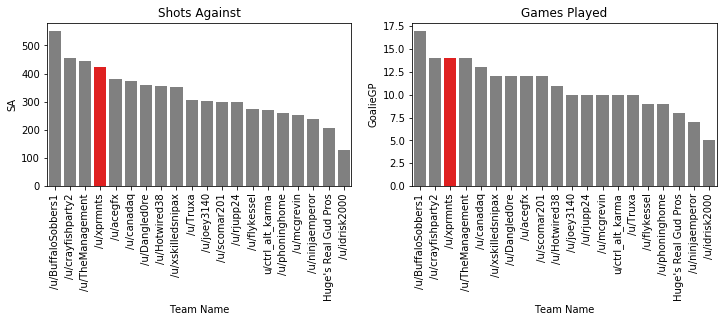

In [8]:
fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(12,3))

clrs = ['red' if ( x == '/u/xprmnts') else 'grey' for x in df_goalies_sorted_bySA['Team Name']]
sns.barplot(x='Team Name', y='SA', data=df_goalies_sorted_bySA, palette=clrs, ax=ax1)
ax1.set_title('Shots Against')
for item in ax1.get_xticklabels():
    item.set_rotation(90)
    
clrs2 = ['red' if ( x == '/u/xprmnts') else 'grey' for x in df_goalies_sorted_byGP['Team Name']]
sns.barplot(x='Team Name', y='GoalieGP', data=df_goalies_sorted_byGP, palette=clrs2, ax=ax2)
ax2.set_title('Games Played')
for item in ax2.get_xticklabels():
    item.set_rotation(90)


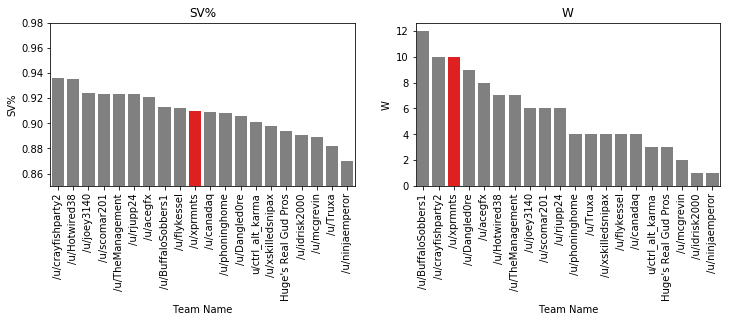

In [9]:
fig,(ax3,ax4) = plt.subplots(ncols=2, figsize=(12,3))
clrs3 = ['red' if ( x == '/u/xprmnts') else 'grey' for x in df_goalies_sorted_bySVP['Team Name']]
sns.barplot(x='Team Name', y='SV%', data=df_goalies_sorted_bySVP, palette=clrs3, ax=ax3)
for item in ax3.get_xticklabels():
    item.set_rotation(90)
ax3.set_title('SV%')
ax3.set_ylim([.85,.98])

clrs4 = ['red' if ( x == '/u/xprmnts') else 'grey' for x in df_goalies_sorted_byW['Team Name']]
sns.barplot(x='Team Name', y='W', data=df_goalies_sorted_byW, palette=clrs4, ax=ax4)
for item in ax4.get_xticklabels():
    item.set_rotation(90)
ax4.set_title('W')

In [10]:
# Examining the correlation in statistics for goalies
df_goalies_corr = df_goalies.corr()
df_goalies_corr.sort_values('Rank', ascending=False)

,Rank,GoalieGP,W,GAA,SA,SV%,SHO
Rank,1.000000,0.741744,0.768176,-0.712127,0.748388,0.791047,0.686890
SV%,0.791047,0.538196,0.672853,-0.932107,0.536323,1.000000,0.588649
W,0.768176,0.844667,1.000000,-0.557467,0.876448,0.672853,0.552462
SA,0.748388,0.966389,0.876448,-0.359554,1.000000,0.536323,0.547273
GoalieGP,0.741744,1.000000,0.844667,-0.400361,0.966389,0.538196,0.529769
SHO,0.686890,0.529769,0.552462,-0.485646,0.547273,0.588649,1.000000
GAA,-0.712127,-0.400361,-0.557467,1.000000,-0.359554,-0.932107,-0.485646


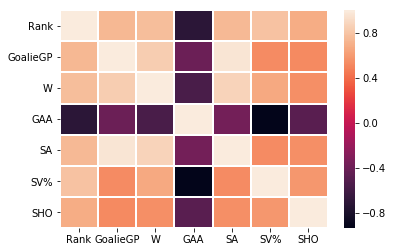

In [11]:
sns.heatmap(df_goalies.corr(), linewidths=1)

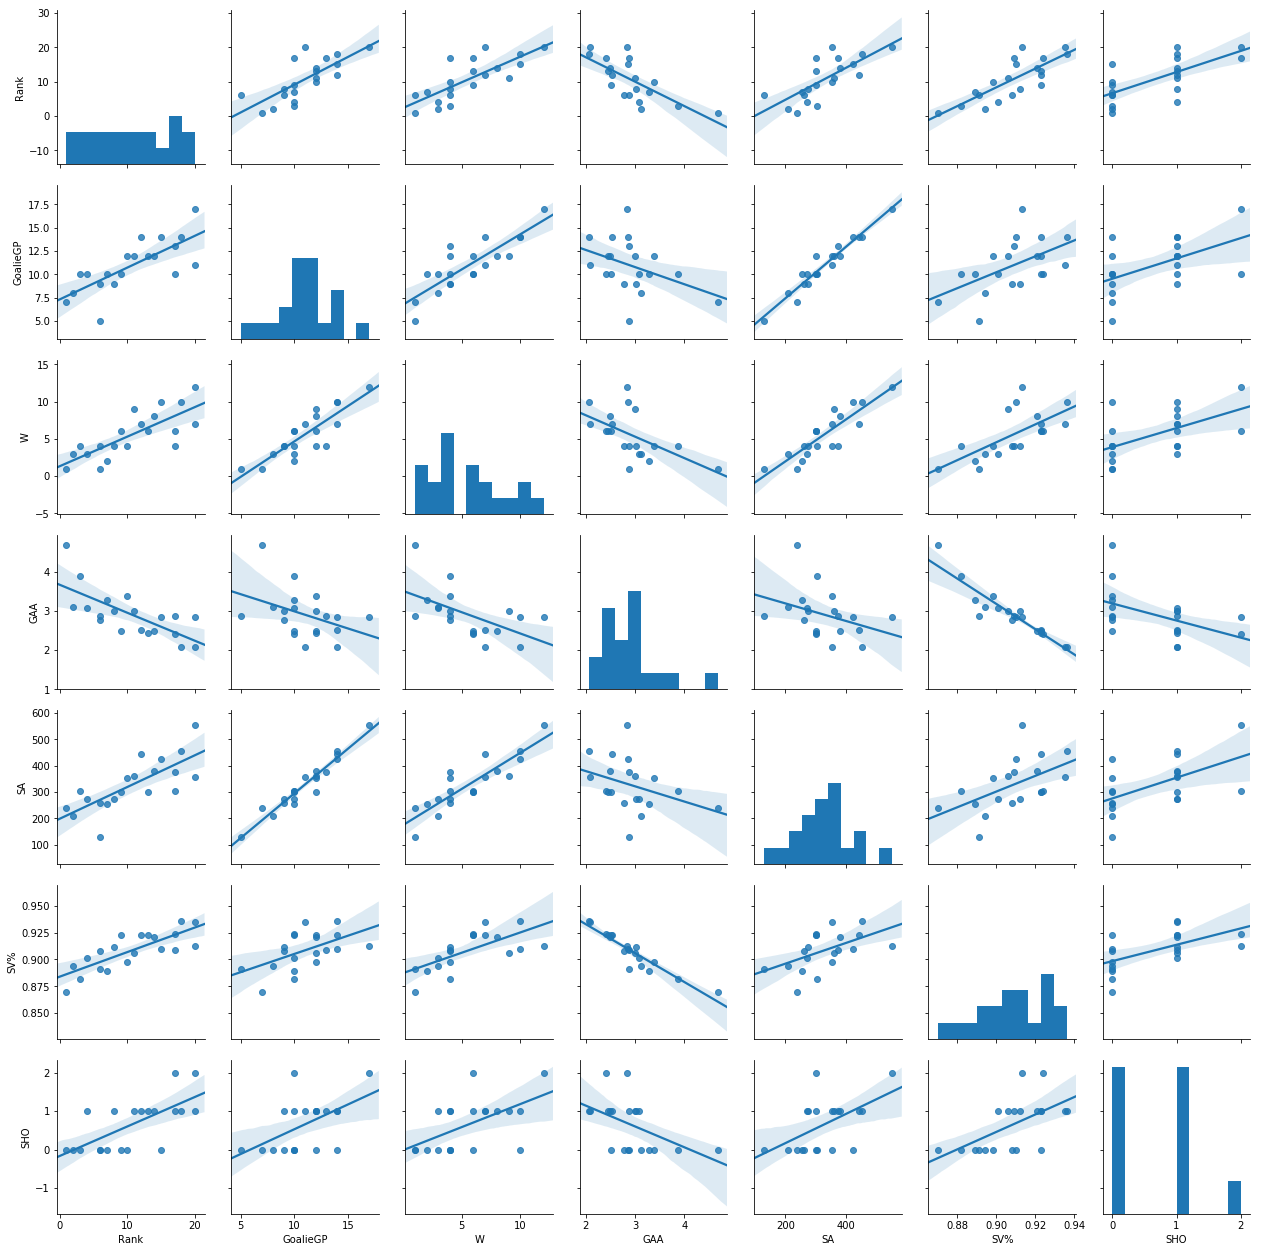

In [12]:
sns.pairplot(data=df_goalies,kind='reg')

### Goalie effects

After examining the tables and plots above we can come to a few conclusions:
1. All the goalie stats are positively corrolated, the most important however are Wins, Shots Against and Games Played (althought games played isn't a stat but tells us that it is indirectly corrolated with other stats)
2. Shot's Against has the strongest correlation with GamesPlayed - which is common sense and is nicely corroborated by the data - this indicates that I should try to increase the volume of games played for my Goalies.

My predicament when I joined the league was that I did not pick good goalies during the draft, so I am left with scraps, but based on the data above it turns out the most important factor (SA) in influencing rank can be manipulated easily despite my poor goalie selection during the draft. I can try to pick up goalies in free agency and cycle through them based on their upcoming schedule (add them before they are likely to play and drop them promptly after they play). It remains to be seen how wins & save % will shake out as the rest of the season goes. Might have to re-evaluate this strategy after a certain point and perhaps trade for a goalie that might have better win and save % stats.

In [13]:
df_players.describe()

,Rank,PlayerGP,G,A,+/-,PIM,PPP,SHP,SOG,FW,HIT,BLK
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,10.650000,126.700000,28.950000,47.450000,-3.100000,69.350000,23.450000,1.600000,277.950000,278.950000,136.900000,95.950000
std,6.002412,10.687425,5.423875,9.550282,17.283701,21.384389,6.065216,1.313893,36.487164,105.130233,33.765289,17.977984
min,1.000000,108.000000,17.000000,31.000000,-40.000000,32.000000,12.000000,0.000000,202.000000,63.000000,77.000000,65.000000
25%,6.000000,116.250000,25.000000,41.750000,-13.000000,56.500000,21.750000,0.750000,249.500000,229.000000,113.750000,83.500000
50%,10.500000,131.000000,29.500000,47.500000,-4.500000,68.000000,25.000000,1.500000,275.500000,272.500000,137.000000,94.000000
75%,15.500000,134.250000,34.000000,52.500000,11.250000,86.000000,28.000000,2.250000,309.000000,332.750000,161.000000,109.000000
max,20.000000,141.000000,39.000000,67.000000,29.000000,111.000000,33.000000,4.000000,329.000000,449.000000,184.000000,129.000000


In [14]:
df_players.median()

Rank         10.5
PlayerGP    131.0
G            29.5
A            47.5
+/-          -4.5
PIM          68.0
PPP          25.0
SHP           1.5
SOG         275.5
FW          272.5
HIT         137.0
BLK          94.0
dtype: float64

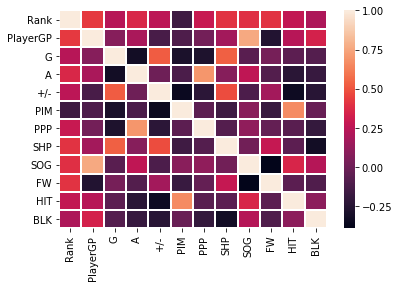

In [15]:
sns.heatmap(df_players.corr(), linewidths=1)

In [16]:
df_players_corr = df_players.corr()

In [17]:
df_players_corr.sort_values('Rank', ascending=False)

,Rank,PlayerGP,G,A,+/-,PIM,PPP,SHP,SOG,FW,HIT,BLK
Rank,1.000000,0.427368,0.235462,0.364636,0.253306,-0.159320,0.289354,0.408425,0.397156,0.405737,0.274307,0.202725
PlayerGP,0.427368,1.000000,0.079628,0.196309,-0.126964,-0.104068,0.020867,0.174662,0.764288,-0.262476,0.236917,0.342325
SHP,0.408425,0.174662,0.536183,0.082210,0.480219,-0.159599,-0.081896,1.000000,0.017127,0.285620,-0.054335,-0.319517
FW,0.405737,-0.262476,0.032209,-0.089616,0.172545,-0.178782,-0.030256,0.285620,-0.389232,1.000000,-0.063238,-0.097800
SOG,0.397156,0.764288,-0.065436,0.262423,-0.108921,0.088321,0.110458,0.017127,1.000000,-0.389232,0.358890,0.229710
A,0.364636,0.196309,-0.321635,1.000000,0.004113,-0.116524,0.697777,0.082210,0.262423,-0.089616,-0.233577,-0.186852
PPP,0.289354,0.020867,-0.277661,0.697777,-0.226985,-0.056060,1.000000,-0.081896,0.110458,-0.030256,-0.067616,-0.197682
HIT,0.274307,0.236917,-0.053195,-0.233577,-0.339298,0.666064,-0.067616,-0.054335,0.358890,-0.063238,1.000000,0.100480
+/-,0.253306,-0.126964,0.525448,0.004113,1.000000,-0.348071,-0.226985,0.480219,-0.108921,0.172545,-0.339298,-0.240710
G,0.235462,0.079628,1.000000,-0.321635,0.525448,-0.289349,-0.277661,0.536183,-0.065436,0.032209,-0.053195,-0.083689


In [18]:
df_players_sorted_byPlayerGP = df_players.sort_values('PlayerGP', ascending=False)
df_players_sorted_byG = df_players.sort_values('G', ascending=False)
df_players_sorted_byA = df_players.sort_values('A', ascending=False)
df_players_sorted_byPM = df_players.sort_values('+/-', ascending=False)
df_players_sorted_byPIM = df_players.sort_values('PIM', ascending=False)
df_players_sorted_byPPP = df_players.sort_values('PPP', ascending=False)
df_players_sorted_bySHP = df_players.sort_values('SHP', ascending=False)
df_players_sorted_bySOG = df_players.sort_values('SOG', ascending=False)
df_players_sorted_byHIT = df_players.sort_values('HIT', ascending=False)
df_players_sorted_byBLK = df_players.sort_values('BLK', ascending=False)
df_players_sorted_byFW = df_players.sort_values('FW', ascending=False)

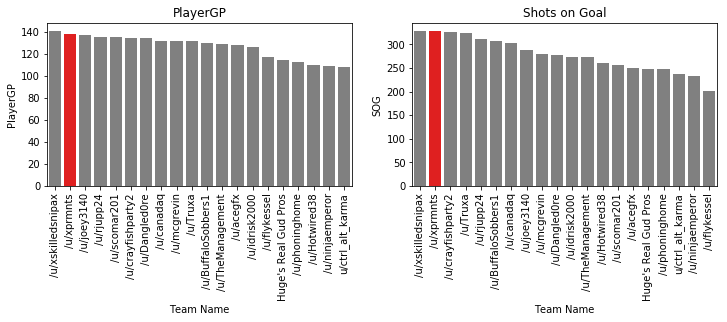

In [19]:
fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(12,3))

clrs = ['red' if ( x == '/u/xprmnts') else 'grey' for x in df_players_sorted_byPlayerGP['Team Name']]
sns.barplot(x='Team Name', y='PlayerGP', data=df_players_sorted_byPlayerGP, palette=clrs, ax=ax1)
ax1.set_title('PlayerGP')
for item in ax1.get_xticklabels():
    item.set_rotation(90)

clrs2 = ['red' if ( x == '/u/xprmnts') else 'grey' for x in df_players_sorted_bySOG['Team Name']]
sns.barplot(x='Team Name', y='SOG', data=df_players_sorted_bySOG, palette=clrs2, ax=ax2)
ax2.set_title('Shots on Goal')
for item in ax2.get_xticklabels():
    item.set_rotation(90)
    

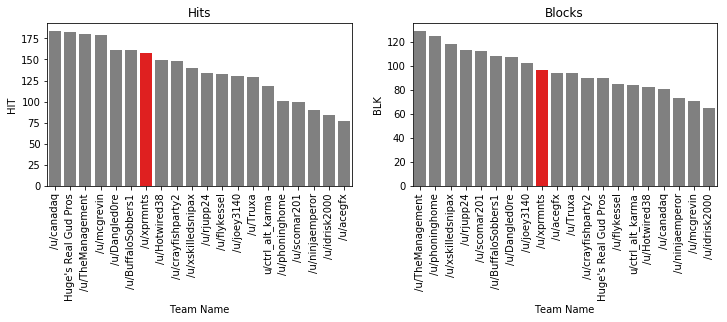

In [20]:
fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(12,3))

clrs = ['red' if ( x == '/u/xprmnts') else 'grey' for x in df_players_sorted_byHIT['Team Name']]
sns.barplot(x='Team Name', y='HIT', data=df_players_sorted_byHIT, palette=clrs, ax=ax1)
ax1.set_title('Hits')
for item in ax1.get_xticklabels():
    item.set_rotation(90)

clrs2 = ['red' if ( x == '/u/xprmnts') else 'grey' for x in df_players_sorted_byBLK['Team Name']]
sns.barplot(x='Team Name', y='BLK', data=df_players_sorted_byBLK, palette=clrs2, ax=ax2)
ax2.set_title('Blocks')
for item in ax2.get_xticklabels():
    item.set_rotation(90)

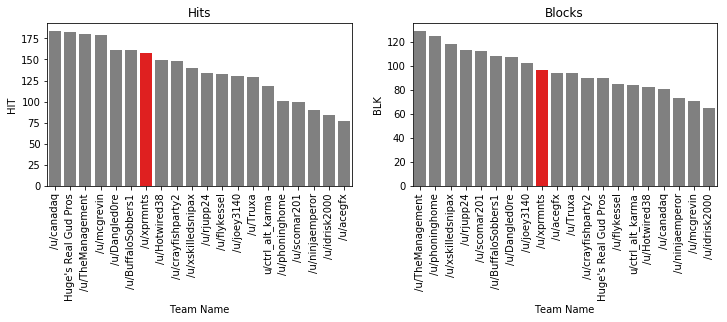

In [21]:
fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(12,3))

clrs = ['red' if ( x == '/u/xprmnts') else 'grey' for x in df_players_sorted_byHIT['Team Name']]
sns.barplot(x='Team Name', y='HIT', data=df_players_sorted_byHIT, palette=clrs, ax=ax1)
ax1.set_title('Hits')
for item in ax1.get_xticklabels():
    item.set_rotation(90)

clrs2 = ['red' if ( x == '/u/xprmnts') else 'grey' for x in df_players_sorted_byBLK['Team Name']]
sns.barplot(x='Team Name', y='BLK', data=df_players_sorted_byBLK, palette=clrs2, ax=ax2)
ax2.set_title('Blocks')
for item in ax2.get_xticklabels():
    item.set_rotation(90)

In [22]:
#df.corr().sort_values('Rank', ascending=False)

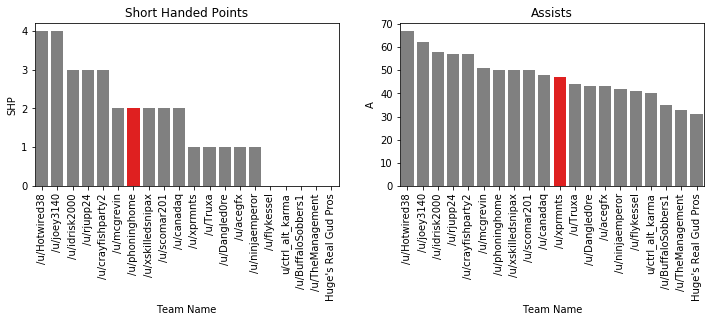

In [23]:
fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(12,3), sharex=True)

clrs = ['red' if ( x == '/u/xprmnts') else 'grey' for x in df_players_sorted_byHIT['Team Name']]
sns.barplot(x='Team Name', y='SHP', data=df_players_sorted_bySHP, palette=clrs, ax=ax1)
ax1.set_title('Short Handed Points')
for item in ax1.get_xticklabels():
    item.set_rotation(90)

clrs2 = ['red' if ( x == '/u/xprmnts') else 'grey' for x in df_players_sorted_byA['Team Name']]
sns.barplot(x='Team Name', y='A', data=df_players_sorted_byA, palette=clrs2, ax=ax2)
ax2.set_title('Assists')
for item in ax2.get_xticklabels():
    item.set_rotation(90)

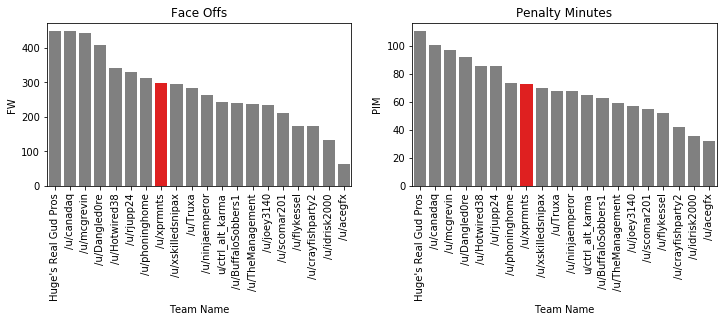

In [24]:
fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(12,3), sharex=True)

clrs = ['red' if ( x == '/u/xprmnts') else 'grey' for x in df_players_sorted_byFW['Team Name']]
sns.barplot(x='Team Name', y='FW', data=df_players_sorted_byFW, palette=clrs, ax=ax1)
ax1.set_title('Face Offs')
for item in ax1.get_xticklabels():
    item.set_rotation(90)

clrs2 = ['red' if ( x == '/u/xprmnts') else 'grey' for x in df_players_sorted_byPIM['Team Name']]
sns.barplot(x='Team Name', y='PIM', data=df_players_sorted_byPIM, palette=clrs2, ax=ax2)
ax2.set_title('Penalty Minutes')
for item in ax2.get_xticklabels():
    item.set_rotation(90)